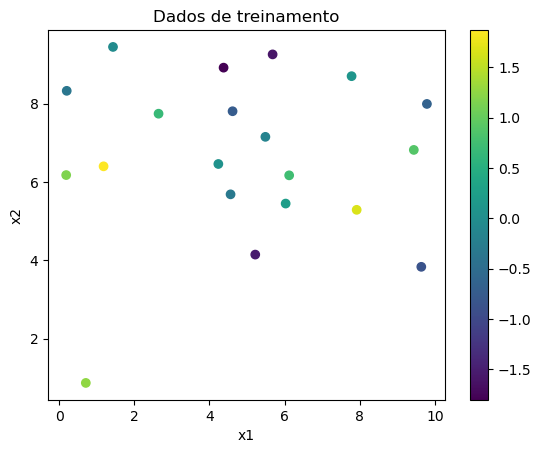

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import kriging as kg

# Função de variograma exponencial
def exponential_variogram(h, sill=1, range_=1):
    return sill * (1 - np.exp(-h / range_))

# Gerando dados de treinamento (20 pontos em um grid 2D)
np.random.seed(0)
x_train = np.random.rand(20, 2) * 10  # Pontos de entrada (bidimensionais) entre 0 e 10
z_train = np.sin(x_train[:, 0]) + np.cos(x_train[:, 1]) + np.random.normal(0, 0.1, 20)  # Valores z com um pouco de ruído

# Apresentando os dados de treinamento
plt.figure()
plt.scatter(x_train[:, 0], x_train[:, 1], c=z_train, cmap='viridis')
plt.colorbar()
plt.title('Dados de treinamento')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()


In [5]:
# Criando e ajustando o modelo de Kriging
model = kg.KrigingModel(x_train, z_train, exponential_variogram)
model.fit()


array([ 0.07814745, -0.01626961, -0.24790166,  1.56034872,  1.09783937,
       -1.66356738,  1.2687613 , -1.22019446,  0.67522607, -0.23547498,
        1.05634878,  0.2940942 , -1.6451345 ,  0.04550481,  1.70978277,
       -0.68920344,  0.331601  , -0.5804672 , -0.81422335, -1.00521788])

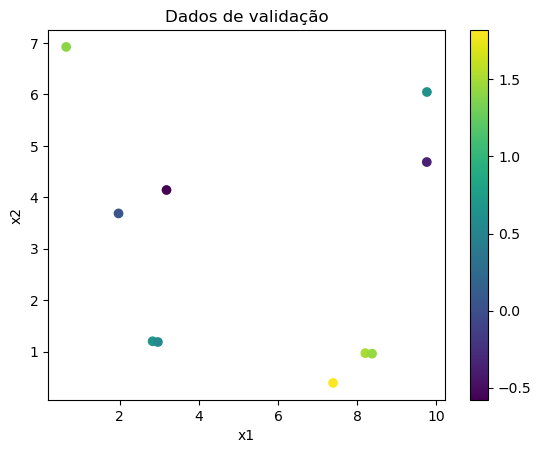

In [6]:
# Gerando novos pontos para validação
x_valid = np.random.rand(10, 2) * 10  # Novos pontos de entrada para validação
z_valid = np.sin(x_valid[:, 0]) + np.cos(x_valid[:, 1])  # Valores verdadeiros de z sem ruído

# Apresentando pontos de validação
plt.figure()
plt.scatter(x_valid[:, 0], x_valid[:, 1], c=z_valid, cmap='viridis')
plt.colorbar()
plt.title('Dados de validação')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

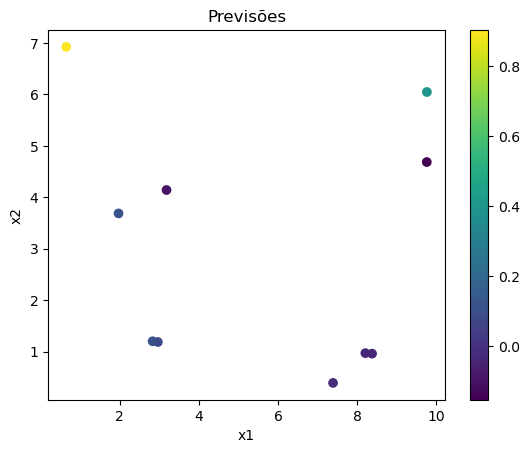

In [7]:
# Fazendo previsões
predictions = [model.predict(x) for x in x_valid]

# Apresentando previsões
plt.figure()
plt.scatter(x_valid[:, 0], x_valid[:, 1], c=predictions, cmap='viridis')
plt.colorbar()
plt.title('Previsões')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [8]:
# Calculando o MSE
mse = model.mean_squared_error(x_valid, z_valid)
print(f"Erro quadrático médio (MSE): {mse}")


Erro quadrático médio (MSE): 0.9056296031020972


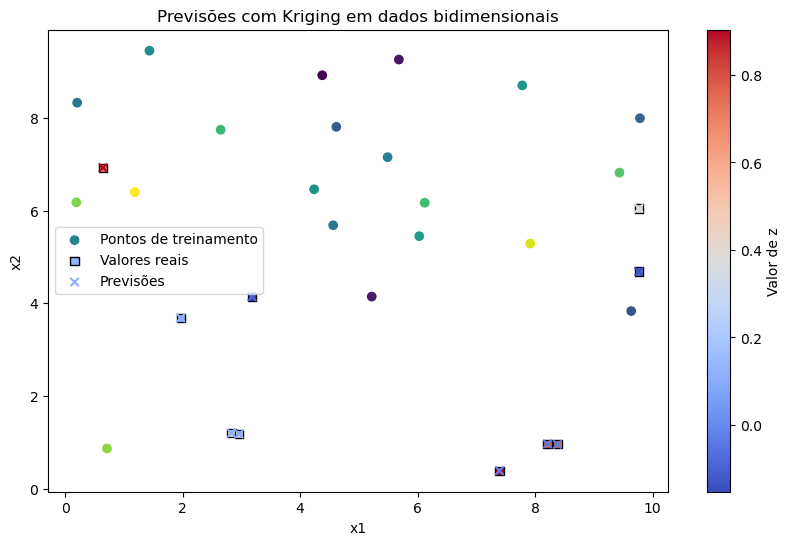

In [9]:
# Plotando os resultados
plt.figure(figsize=(10, 6))

# Dados de treinamento
plt.scatter(x_train[:, 0], x_train[:, 1], c=z_train, cmap='viridis', label="Pontos de treinamento", marker='o')

# Dados reais para validação (comparação)
plt.scatter(x_valid[:, 0], x_valid[:, 1], c=z_valid, cmap='coolwarm', edgecolor='black', label="Valores reais", marker='s')

# Previsões (dados de validação)
plt.scatter(x_valid[:, 0], x_valid[:, 1], c=predictions, cmap='coolwarm', label="Previsões", marker='x')

plt.colorbar(label='Valor de z')
plt.legend()
plt.title('Previsões com Kriging em dados bidimensionais')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()